# **📊 Evaluating Revenue Differences Across Marketing Campaign Types Using ANOVA**

**Description:**

This project uses **ANOVA (Analysis of Variance)** to examine whether the average revenue generated differs significantly across three distinct marketing campaign types: Email, Social Media, and TV campaigns. Using a synthetic dataset representing revenue data for 90 customers evenly split among these campaigns, the project assesses whether the observed revenue differences are statistically significant. We thoroughly check ANOVA assumptions, including normality of revenue within groups, homogeneity of variances across groups, and independence of observations, with statistical tests and visualization. Finally, the ANOVA F-test is conducted to identify if campaign types have a meaningful effect on revenue, guiding marketing strategy decisions.

## **✅ 1. Import Necessary Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro, levene, f_oneway, probplot
import warnings
warnings.filterwarnings("ignore")


## **✅ 2. Business Scenario & Goal**

A company runs three different marketing campaigns (Email, Social Media, TV) and wants to analyze if there are significant differences in average customer revenue generated by each campaign type.

## **✅ 3. Define Hypotheses**

* **Null Hypothesis (H₀):** Mean revenues are equal across Email, Social Media, and TV campaign groups.

* **Alternative Hypothesis (H₁):** At least one campaign group has a different mean revenue.

**Testing at α = 0.05.**

## **✅ 4. Generate Synthetic Dataset (Revenue by Campaign Type)**

In [2]:
np.random.seed(101)

# Sample size per group
n_per_group = 30

# Generate revenue data for each campaign type with different means
email_revenue = np.random.normal(loc=250, scale=30, size=n_per_group)
social_revenue = np.random.normal(loc=270, scale=25, size=n_per_group)
tv_revenue = np.random.normal(loc=260, scale=35, size=n_per_group)

# Combine into one DataFrame
campaign_types = ['Email']*n_per_group + ['Social Media']*n_per_group + ['TV']*n_per_group
revenue = np.concatenate([email_revenue, social_revenue, tv_revenue])

sales_data = pd.DataFrame({'campaign_type': campaign_types, 'revenue': revenue})
sales_data.head()


,campaign_type,revenue
0,Email,331.205495
1,Email,268.843981
2,Email,277.239083
3,Email,265.114773
4,Email,269.533538


from matplotlib import pyplot as plt
_df_0['revenue'].plot(kind='hist', bins=20, title='revenue')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['revenue'].plot(kind='line', figsize=(8, 4), title='revenue')
plt.gca().spines[['top', 'right']].set_visible(False)

## **✅ 5. Data Visualization to Understand Distribution**

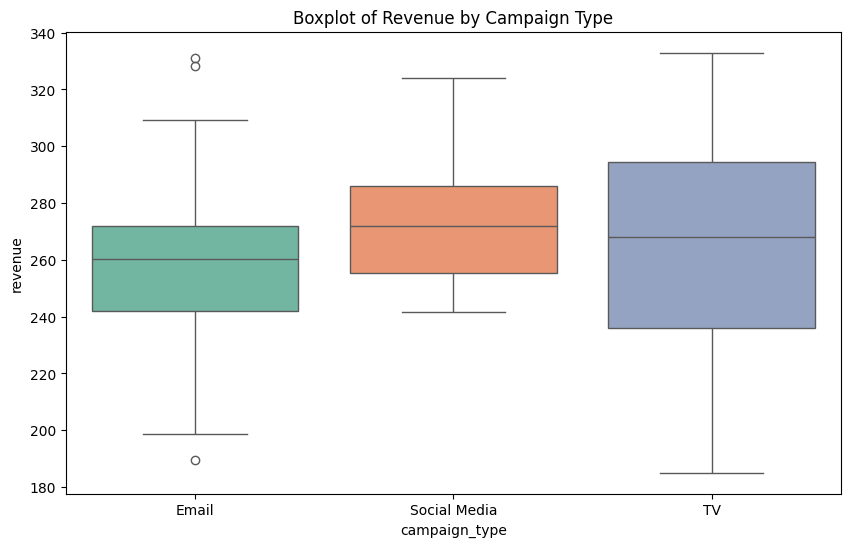

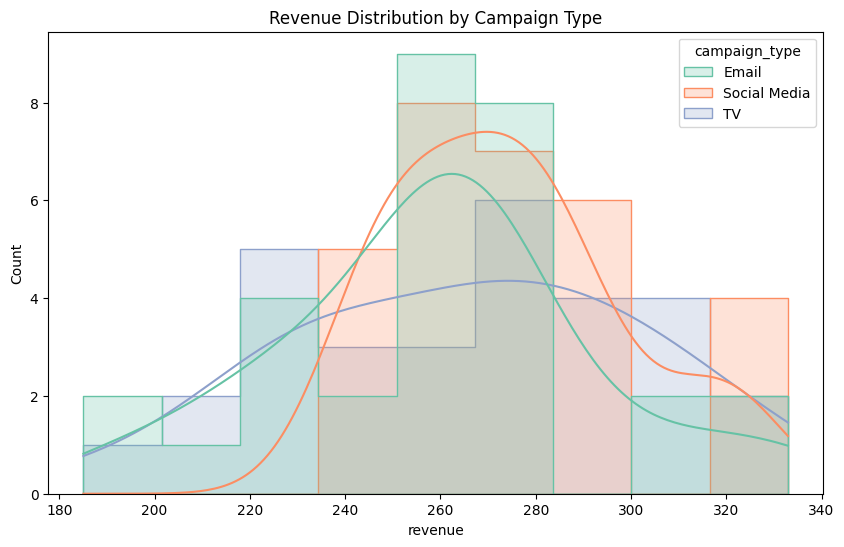

In [3]:
plt.figure(figsize=(10,6))
sns.boxplot(x='campaign_type', y='revenue', data=sales_data, palette='Set2')
plt.title('Boxplot of Revenue by Campaign Type')
plt.show()

plt.figure(figsize=(10,6))
sns.histplot(data=sales_data, x='revenue', hue='campaign_type', kde=True, element='step', palette='Set2')
plt.title('Revenue Distribution by Campaign Type')
plt.show()


## **✅ 6. Assumption Checks for ANOVA**

**A. Normality Check (Shapiro-Wilk Test) per group & Q-Q plots**

Email Group: Shapiro-Wilk p-value = 0.3535


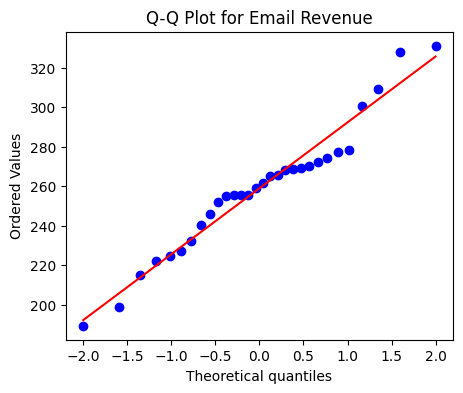

Social Media Group: Shapiro-Wilk p-value = 0.0639


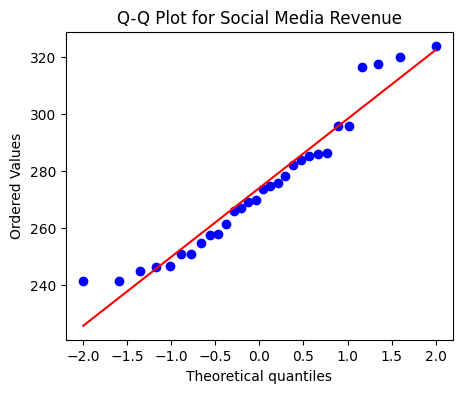

TV Group: Shapiro-Wilk p-value = 0.9378


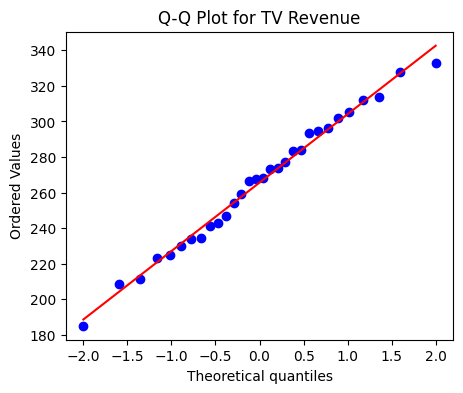

In [4]:
for group in sales_data['campaign_type'].unique():
    group_data = sales_data[sales_data['campaign_type'] == group]['revenue']
    stat, p = shapiro(group_data)
    print(f"{group} Group: Shapiro-Wilk p-value = {p:.4f}")

    plt.figure(figsize=(5,4))
    probplot(group_data, dist="norm", plot=plt)
    plt.title(f'Q-Q Plot for {group} Revenue')
    plt.show()


**B. Homogeneity of Variance (Levene's Test)**

In [5]:
email = sales_data[sales_data['campaign_type'] == 'Email']['revenue']
social = sales_data[sales_data['campaign_type'] == 'Social Media']['revenue']
tv = sales_data[sales_data['campaign_type'] == 'TV']['revenue']

stat, p = levene(email, social, tv)
print(f"Levene's Test p-value = {p:.4f}")


Levene's Test p-value = 0.0844


## **✅ 7. Perform ANOVA Test**

In [6]:
f_stat, p_val = f_oneway(email, social, tv)
print(f"ANOVA Result: F-statistic = {f_stat:.4f}, p-value = {p_val:.4f}")


ANOVA Result: F-statistic = 1.6986, p-value = 0.1890


## **✅ 8. Interpretation of Results**

In [7]:
alpha = 0.05
if p_val < alpha:
    conclusion = "✅ Reject the null hypothesis: At least one campaign type has a significantly different mean revenue."
else:
    conclusion = "❌ Fail to reject the null hypothesis: No significant difference in mean revenue among the campaign types."

print(conclusion)


❌ Fail to reject the null hypothesis: No significant difference in mean revenue among the campaign types.


**Conclusion:**

The ANOVA test produced an F-statistic of 1.6986 with a p-value of 0.1890, which is greater than the significance level of 0.05. This indicates that there is insufficient evidence to reject the null hypothesis, meaning we do not find a statistically significant difference in the average revenue generated across the Email, Social Media, and TV campaign types. In other words, the variations in mean revenue between these marketing campaigns are likely due to random chance rather than a true effect, suggesting that none of the campaign types significantly outperforms the others in driving revenue.